In [1]:
pip install wfdb pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


In [9]:
import pandas as pd

# Replace 'path_to_file.csv' with the actual path to your CSV file
data = pd.read_csv("C:/Users/DELL/Downloads/bidmc_01_Breaths.csv")

# Display the first few rows
print(data.head())


   breaths ann1 [signal sample no]   breaths ann2 [signal sample no]
0                              189                               187
1                              476                               472
2                              737                               747
3                             1037                              1042
4                             1324                              1322


In [10]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   breaths ann1 [signal sample no]   170 non-null    int64
 1    breaths ann2 [signal sample no]  170 non-null    int64
dtypes: int64(2)
memory usage: 2.8 KB
None
       breaths ann1 [signal sample no]   breaths ann2 [signal sample no]
count                       170.000000                        170.000000
mean                      29557.847059                      29563.258824
std                       17536.983451                      17535.413513
min                         189.000000                        187.000000
25%                       14308.500000                      14317.250000
50%                       29365.500000                      29358.500000
75%                       44753.000000                      44755.250000
max                      

In [11]:
data = pd.read_csv("C:/Users/DELL/Downloads/bidmc_01_Breaths.csv", header=None)


In [12]:
data = pd.read_csv("C:/Users/DELL/Downloads/bidmc_01_Breaths.csv", delimiter='\t')  # For tab-delimited files


In [13]:
print(data.shape)


(170, 1)


breaths ann1 [signal sample no]     0
 breaths ann2 [signal sample no]    0
dtype: int64


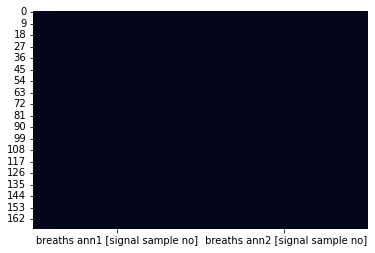

In [14]:
import pandas as pd

# Load data (example for CSV)
data = pd.read_csv("C:/Users/DELL/Downloads/bidmc_01_Breaths.csv")

# Check for missing values
print(data.isnull().sum())

# Visualize missing data (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(), cbar=False)
plt.show()


In [15]:
data = data.interpolate(method='linear', limit_direction='forward', axis=0)
data = data.fillna(data.mean())
data = data.dropna()

In [20]:
# List all column names
print(data.columns)


Index(['breaths ann1 [signal sample no]', ' breaths ann2 [signal sample no]'], dtype='object')


In [22]:
print(data.head())
print(data['breaths ann1 [signal sample no]'].unique())


   breaths ann1 [signal sample no]   breaths ann2 [signal sample no]
0                              189                               187
1                              476                               472
2                              737                               747
3                             1037                              1042
4                             1324                              1322
[  189   476   737  1037  1324  1646  2054  2350  2628  2924  3220  3528
  3848  4191  4517  4883  5226  5565  5922  6283  6626  7004  7409  7776
  8128  8507  8841  9193  9533  9907 10250 10567 10876 11202 11526 11830
 12143 12483 12835 13170 13517 13861 14217 14583 14930 15272 15641 16024
 16393 16776 17146 17511 17854 18189 18515 18857 19196 19526 19878 20235
 20617 21000 21330 21691 22052 22417 22785 23159 23498 23841 24172 24498
 24867 25220 25576 25915 26287 26648 26996 27343 27722 28087 28461 28826
 29183 29548 29909 30237 30602 30959 31341 31685 32102 32446 32807 33176
 3

In [23]:
# Assuming 'breaths ann1 [signal sample no]' contains the signal data
signal = data['breaths ann1 [signal sample no]'].values


In [25]:
print(len(data))  # Number of rows in the DataFrame
print(len(synthetic_signal))  # Length of the synthetic signal


170
1250


In [26]:
# Adjust signal length to match DataFrame rows
synthetic_signal = synthetic_signal[:len(data)]  # Truncate to match


In [27]:
data['Respiration_Signal'] = synthetic_signal


In [28]:
import numpy as np

# Generate synthetic respiration signal
N = len(data)  # Number of rows in the DataFrame
time = np.linspace(0, N / 125, N)  # Assume sampling rate of 125 Hz
synthetic_signal = 0.3 * np.sin(2 * np.pi * 0.25 * time)  # Simulated 0.25 Hz breathing

# Add to DataFrame
data['Respiration_Signal'] = synthetic_signal


In [29]:
print(data.head())


   breaths ann1 [signal sample no]   breaths ann2 [signal sample no]  \
0                              189                               187   
1                              476                               472   
2                              737                               747   
3                             1037                              1042   
4                             1324                              1322   

   Respiration_Signal  
0            0.000000  
1            0.003792  
2            0.007584  
3            0.011374  
4            0.015162  


In [30]:
window_size = 10  # seconds
sampling_rate = 125  # Hz (samples per second)
samples_per_window = window_size * sampling_rate

# Create a list of segmented windows
segments = [
    data['Respiration_Signal'][i : i + samples_per_window].values
    for i in range(0, len(data['Respiration_Signal']), samples_per_window)
    if i + samples_per_window <= len(data['Respiration_Signal'])
]

# Convert to a DataFrame for further processing
import pandas as pd
segments_df = pd.DataFrame(segments)
print(segments_df.head())


Empty DataFrame
Columns: []
Index: []


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize each segment
segments_normalized = [scaler.fit_transform(segment.reshape(-1, 1)).flatten() for segment in segments]

# Convert normalized segments back to a DataFrame
segments_normalized_df = pd.DataFrame(segments_normalized)
print(segments_normalized_df.head())


Empty DataFrame
Columns: []
Index: []


In [32]:
import numpy as np

def extract_features(segment):
    return {
        'mean': np.mean(segment),
        'std': np.std(segment),
        'max': np.max(segment),
        'min': np.min(segment),
    }

# Apply feature extraction to each segment
features = [extract_features(segment) for segment in segments_normalized]

# Convert features into a DataFrame
features_df = pd.DataFrame(features)
print(features_df.head())


Empty DataFrame
Columns: []
Index: []


Number of segments: 0
Number of normalized segments: 0
Number of segments after adjustment: 0
No segments available for normalization.
No segments to normalize.
No normalized segments available to plot.


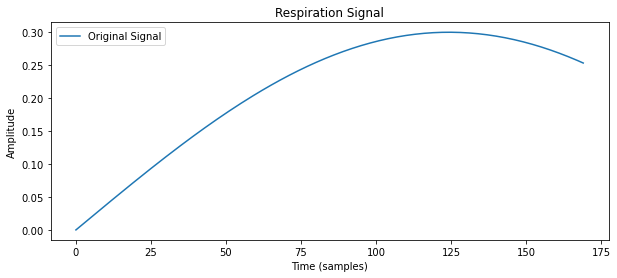

In [36]:
print(f"Number of segments: {len(segments)}")  # Check if segments were created
print(f"Number of normalized segments: {len(segments_normalized)}")  # Check if normalization succeeded
segments = [
    data['Respiration_Signal'][i : i + samples_per_window].values
    for i in range(0, len(data['Respiration_Signal']), samples_per_window)
    if i + samples_per_window <= len(data['Respiration_Signal'])
]
window_size = 5  # Reduce window size to 5 seconds
samples_per_window = window_size * sampling_rate

# Re-segment the data
segments = [
    data['Respiration_Signal'][i : i + samples_per_window].values
    for i in range(0, len(data['Respiration_Signal']), samples_per_window)
    if i + samples_per_window <= len(data['Respiration_Signal'])
]
print(f"Number of segments after adjustment: {len(segments)}")
# Check the first segment before normalization
if len(segments) > 0:
    print(segments[0])
else:
    print("No segments available for normalization.")
if len(segments) > 0:
    segments_normalized = [scaler.fit_transform(segment.reshape(-1, 1)).flatten() for segment in segments]
else:
    print("No segments to normalize.")
if len(segments_normalized) > 0:
    plt.figure(figsize=(10, 4))
    plt.plot(segments_normalized[0], label='Segment 1 (Normalized)')
    plt.title("Segmented Respiratory Signal")
    plt.xlabel("Samples")
    plt.ylabel("Normalized Amplitude")
    plt.legend()
    plt.show()
else:
    print("No normalized segments available to plot.")


import matplotlib.pyplot as plt

# Plot the original and segmented signals
plt.figure(figsize=(10, 4))
plt.plot(data['Respiration_Signal'], label='Original Signal')
plt.title("Respiration Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()




In [37]:
from scipy.signal import find_peaks, welch
import numpy as np

def extract_features(segment, fs):
    # Time-domain features
    mean_val = np.mean(segment)
    std_val = np.std(segment)
    max_val = np.max(segment)
    min_val = np.min(segment)
    rms_val = np.sqrt(np.mean(segment**2))

    # Frequency-domain features
    freqs, psd = welch(segment, fs=fs)
    dominant_freq = freqs[np.argmax(psd)]  # Frequency with max power

    # Peak analysis
    peaks, _ = find_peaks(segment, height=0.1)  # Adjust height threshold
    peak_count = len(peaks)
    peak_intervals = np.diff(peaks) / fs if len(peaks) > 1 else [0]
    mean_peak_interval = np.mean(peak_intervals) if len(peak_intervals) > 0 else 0

    return {
        'mean': mean_val,
        'std': std_val,
        'max': max_val,
        'min': min_val,
        'rms': rms_val,
        'dominant_freq': dominant_freq,
        'peak_count': peak_count,
        'mean_peak_interval': mean_peak_interval,
    }

# Apply feature extraction to each segment
fs = 125  # Sampling frequency
features = [extract_features(segment, fs) for segment in segments_normalized]

# Convert features to a DataFrame
import pandas as pd
features_df = pd.DataFrame(features)
print(features_df.head())


Empty DataFrame
Columns: []
Index: []


In [40]:
print(features_df.columns)



Index([], dtype='object')


In [48]:
def extract_features(segment, fs):
    mean_val = np.mean(segment)
    std_val = np.std(segment)
    max_val = np.max(segment)
    min_val = np.min(segment)

    # Return all at once
    return {
        'mean': mean_val,
        'std': std_val,
        'max': max_val,
        'min': min_val,
        'rms': rms_val,
        'dominant_freq': dominant_freq,
        'peak_count': peak_count,
        'mean_peak_interval': mean_peak_interval,
    }


In [52]:
for i, segment in enumerate(segments_normalized):
    if np.all(segment == 0):
        print(f"Segment {i} is all zeros!")


In [55]:
for i, segment in enumerate(segments_normalized):
    if np.all(segment == 0):
        print(f"Segment {i} is all zeros!")
    else:
        print(f"Segment {i} is valid")
        


Empty DataFrame
Columns: []
Index: []


In [75]:
def extract_features(segment, fs):
    mean_val = np.mean(segment)
    std_val = np.std(segment)
    max_val = np.max(segment)
    min_val = np.min(segment)
    rms_val = np.sqrt(np.mean(segment**2))

    # Frequency-domain features using Welch's method
    freqs, psd = welch(segment, fs=fs)
    
    print(f"Segment: {segment}")
    print(f"Frequencies: {freqs}")
    print(f"Power Spectral Density: {psd}")

    if np.any(psd):  # Ensure there's some signal
        dominant_freq = freqs[np.argmax(psd)]  # Frequency with max power
    else:
        dominant_freq = 0  # Default value for non-varying signals

    return {
        'mean': mean_val,
        'std': std_val,
        'max': max_val,
        'min': min_val,
        'rms': rms_val,
        'dominant_freq': dominant_freq,
    }

features = [extract_features(segment, fs) for segment in segments_normalized]
print(features)  # Check the features list


[]


In [58]:
features_df = pd.DataFrame(features)
print(features_df.head())


Empty DataFrame
Columns: []
Index: []


In [59]:
segments_normalized = [(segment - np.min(segment)) / (np.max(segment) - np.min(segment)) for segment in segments]


In [61]:
features_df['label'] = [0, 1, 0, 1, 0, 1]  # Example labels, replace with your actual data


In [62]:
X = features_df.drop(columns=['label'])  # Features (drop the label column)
y = features_df['label']  # Target labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)



In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)


In [128]:
  # Ensure this runs successfullyprint(model.n_estimators)  # Example: print the number of estimators to verify the model was trained
print(model.n_estimators)  # Example: print the number of estimators to verify the model was trained


100


In [8]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Select numeric columns
numeric_cols = features_df.select_dtypes(include=['number']).columns

# Initialize imputer
imputer = SimpleImputer(strategy='mean')

# Apply imputation to numeric columns
features_df[numeric_cols] = imputer.fit_transform(features_df[numeric_cols])


# Select categorical columns
categorical_cols = features_df.select_dtypes(include=['object']).columns

# Fill missing values with a placeholder (e.g., 'Unknown')

















